In [1]:
import sys
sys.path.append('../src')
from train_process.train_CNN import train
import pandas as pd

import utils.data_preprocessing.temp_utils as utils
import matplotlib.pyplot as plt
import numpy as np
import mne

### 数据探索和可视化

In [ ]:
file_index = [i for i in range(1,34)]
for eeg_file_name in file_index:
    xlsx=  rf'../src/data/EEG_DATASET/{eeg_file_name}/{eeg_file_name}.xlsx'
    label_df = pd.read_excel(xlsx, 'Sheet1', header=None)
    label_df.rename(columns={0: 'label'}, inplace=True)
    # 打印label中0的个数和1的个数
    print(f"第{eeg_file_name}个人的数据中，label中0的个数为{label_df[label_df['label'] == 0].shape[0]}，label中1的个数为{label_df[label_df['label'] == 1].shape[0]}")


d:\Research\EEG\EEG_DL_Classifier\notebooks\../src\utils\data_preprocessing\temp_utils.py:16: RuntimeWarning: Scaling factor is not defined in following channels:
POL SpO2
  raw = mne.io.read_raw_edf(file_path, preload=True, encoding='latin1')
d:\Research\EEG\EEG_DL_Classifier\notebooks\../src\utils\data_preprocessing\temp_utils.py:16: RuntimeWarning: Physical range is not defined in following channels:
POL SpO2
  raw = mne.io.read_raw_edf(file_path, preload=True, encoding='latin1')


(<matplotlib.image.AxesImage at 0x2d40ffd6550>,
 <matplotlib.contour.QuadContourSet at 0x2d4198cdc50>)

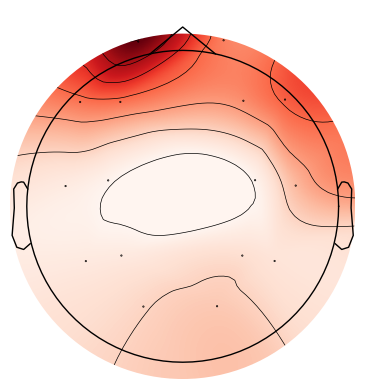

In [14]:

eeg_file_name = 1
file_path = rf'../src/data/EEG_DATASET/{eeg_file_name}/{eeg_file_name}.edf'
# utils.read_edf(file_path)
# 绘制EEG信号
raw = utils.read_edf(file_path)
raw = utils.rename_edf(raw)

# 选取第1秒到第20秒的数据
start, stop = raw.time_as_index([0, 1000*3600])  # 返回第1秒和第20秒的索引

# 选取数据
data, times = raw[:, start:stop]

# 绘制信号
# raw.plot(start=1, duration=29, scalings='auto')
data = np.sum(data**2, axis=1) # 最大值为0.23795628471059346


picks = utils.obtain_picks(raw)
info = utils.obtain_eeg_info(raw, picks)
fig, ax = plt.subplots()

mne.viz.plot_topomap(data, info, axes=ax, show=False, ch_type='eeg',outlines='head',vlim=(0,0.24))


In [ ]:
fig, ax = plt.subplots()
mne.viz.plot_topomap(data, info, axes=ax, show=False, ch_type='eeg',cmap="RdBu_r",colorbar=True)
# Reds， RdBu_r

In [ ]:
eeg_file_name = 1
xlsx=  rf'../src/data/EEG_DATASET/{eeg_file_name}/{eeg_file_name}.xlsx'
label_df = pd.read_excel(xlsx, 'Sheet1', header=None)
label_df.rename(columns={0: 'label'}, inplace=True)
# print(label_df[1:30])

In [ ]:
# 打印src\data\EEG_DATASET中所以以Desktop为开头的文件夹的名字：
import os
path = r'../src/data/EEG_DATASET'
file_list = os.listdir(path)
file_list = [file for file in file_list if file.startswith('Desktop')]

# 对于file_list中的每一个文件夹，打开并且打印其中以.edf结尾的文件的名字
all_edf = []
for file in file_list:
    file_path = os.path.join(path, file)
    file_list = os.listdir(file_path)
    file_list = [file for file in file_list if file.endswith('.edf')]
    all_edf += file_list

set(all_edf)


### 模型训练

In [ ]:
train_args = {
    "model_name": "ResNet18",  
    "is_single_channel": False,
    "eeg_file_names": [str(i) for i in range(1,33)],  # 示例文件名
    "test_mode": False,
    "image_size": 32,
    "batch_size": 256,
    "train_size": 0.8,
    "val_size": 0.1,
    "test_size": 0.1,
    "test_on_each_patient": False,
    "learning_rate": 0.005,
    "out": "D:/Research/EEG/EEG_DL_Classifier/checkpoints",
    "wandb_run_name": "EEG_Classification_Run",
    "disable_wandb": False,
    "enable_progress_bar": True,
    "max_epochs": 30,  # 示例训练周期数
    "patience": 5,
}

train(train_args)


In [ ]:
import torch
from torchviz import make_dot

### 模型可视化

In [ ]:
import torchvision.models as models
from model.CNN import CNN
# resnet = models.resnet50(pretrained=True)

# x = torch.randn(1, 1, 128, 128)
x = torch.zeros(1, 1, 224, 224, dtype=torch.float, requires_grad=False)
model = CNN(learning_rate=0.05)
out = model(x)
make_dot(out)  # plot graph of variable, not of a nn.Module